In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
from sklearn.model_selection import train_test_split
for dirname,_,filenames in os.walk('./'):
    for filename in filenames:
        print(os.path.join(dirname,filename))

./fake_or_real_news.csv
./Untitled.ipynb
./.ipynb_checkpoints\Untitled-checkpoint.ipynb


In [2]:
df=pd.read_csv('./fake_or_real_news.csv')
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


<AxesSubplot:xlabel='label', ylabel='count'>

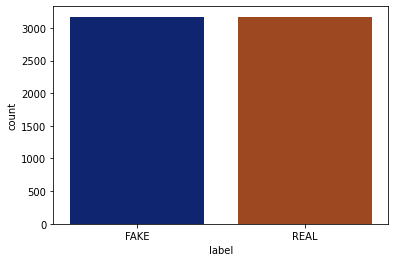

In [3]:
def create_distribution(dataFile):
    return sns.countplot(x='label',data=dataFile,palette='dark')
create_distribution(df)

In [4]:
def data_qualityCheck():
    print('checking data qualities...')
    df.isnull().sum()
    df.info()
    print('check finished.')
data_qualityCheck()

checking data qualities...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB
check finished.


In [5]:
x=df['text']
y=df['label']
#x.head(3),y.head(3)

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer=CountVectorizer(stop_words='english')
from sklearn.feature_extraction.text import TfidfVectorizer

In [8]:
count_train=count_vectorizer.fit_transform(x_train)

In [9]:
count_train.shape

(5068, 61647)

In [10]:
count_vectorizer.vocabulary_

{'washington': 59183,
 'president': 42759,
 'barack': 6199,
 'obama': 38416,
 'trade': 55526,
 'agenda': 2974,
 'cleared': 11330,
 'key': 30520,
 'senate': 48937,
 'hurdle': 26790,
 'final': 21129,
 'vote': 58800,
 'topped': 55317,
 '60': 1473,
 'votes': 58809,
 'needed': 37286,
 'begin': 6727,
 'substantive': 52802,
 'action': 2486,
 'bid': 7211,
 'fast': 20582,
 'track': 55510,
 'negotiating': 37333,
 'authority': 5510,
 '62': 1501,
 '38': 1125,
 'says': 48121,
 'improve': 27500,
 'prospects': 43331,
 'treaty': 55806,
 '11': 182,
 'pacific': 39820,
 'rim': 46678,
 'nations': 37129,
 'labor': 31294,
 'unions': 57203,
 'groups': 24266,
 'vital': 58660,
 'democrats': 15283,
 'strongly': 52577,
 'oppose': 39033,
 'say': 48113,
 'free': 22189,
 'deals': 14677,
 'cost': 13258,
 'jobs': 29713,
 'producers': 43048,
 'need': 37285,
 'broader': 8690,
 'access': 2293,
 'foreign': 21834,
 'markets': 33999,
 'exclusive': 19794,
 '28': 915,
 '500': 1323,
 'deposit': 15504,
 'syed': 53524,
 'farook

In [11]:
count_test=count_vectorizer.transform(x_test)
count_test

<1267x61647 sparse matrix of type '<class 'numpy.int64'>'
	with 330198 stored elements in Compressed Sparse Row format>

In [12]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english',max_df=0.7)

In [13]:
tfidf_train=tfidf_vectorizer.fit_transform(x_train)
print(tfidf_train.shape)
tfidf_train

(5068, 61647)


<5068x61647 sparse matrix of type '<class 'numpy.float64'>'
	with 1328932 stored elements in Compressed Sparse Row format>

In [14]:
tfidf_test=tfidf_vectorizer.transform(x_test)

In [40]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.metrics import plot_confusion_matrix,confusion_matrix,accuracy_score
import matplotlib.pyplot as plt
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import KFold
from sklearn import set_config
import itertools
set_config(display='diagram')

In [16]:
nb_pipeline=Pipeline([('NBTV',tfidf_vectorizer),('nb_clf',MultinomialNB())])
nb_pipeline.fit(x_train,y_train)

Pipeline(steps=[('NBTV', TfidfVectorizer(max_df=0.7, stop_words='english')),
                ('nb_clf', MultinomialNB())])

In [17]:
prediction_nb=nb_pipeline.predict(x_test)
accuracy_score(prediction_nb,y_test)

0.8421468034727704

In [18]:
confusion_matrix(y_test,prediction_nb)

array([[429, 179],
       [ 21, 638]], dtype=int64)

In [19]:
linear_clf=Pipeline([('linear',tfidf_vectorizer),('pa_clf',PassiveAggressiveClassifier(max_iter=50))])
linear_clf.fit(x_train,y_train)

Pipeline(steps=[('linear', TfidfVectorizer(max_df=0.7, stop_words='english')),
                ('pa_clf', PassiveAggressiveClassifier(max_iter=50))])

In [20]:
prediction_clf=linear_clf.predict(x_test)
accuracy_score(prediction_clf,y_test)

0.9352801894238358

In [21]:
confusion_matrix(prediction_clf,y_test)

array([[574,  48],
       [ 34, 611]], dtype=int64)

In [22]:
print(metrics.classification_report(y_test,prediction_clf))

              precision    recall  f1-score   support

        FAKE       0.92      0.94      0.93       608
        REAL       0.95      0.93      0.94       659

    accuracy                           0.94      1267
   macro avg       0.94      0.94      0.94      1267
weighted avg       0.94      0.94      0.94      1267



In [23]:
print(metrics.classification_report(y_test,prediction_nb))

              precision    recall  f1-score   support

        FAKE       0.95      0.71      0.81       608
        REAL       0.78      0.97      0.86       659

    accuracy                           0.84      1267
   macro avg       0.87      0.84      0.84      1267
weighted avg       0.86      0.84      0.84      1267



In [24]:
from sklearn.ensemble import AdaBoostClassifier
linear_ada=Pipeline([('linear',tfidf_vectorizer),('ada_clf',AdaBoostClassifier())])
linear_ada.fit(x_train,y_train)

Pipeline(steps=[('linear', TfidfVectorizer(max_df=0.7, stop_words='english')),
                ('ada_clf', AdaBoostClassifier())])

In [25]:
pred_ada=linear_ada.predict(x_test)
accuracy_score(pred_ada,y_test)

0.8800315706393055

In [26]:
print(metrics.classification_report(y_test,pred_ada))

              precision    recall  f1-score   support

        FAKE       0.87      0.88      0.88       608
        REAL       0.89      0.88      0.88       659

    accuracy                           0.88      1267
   macro avg       0.88      0.88      0.88      1267
weighted avg       0.88      0.88      0.88      1267



In [27]:
from sklearn.svm import SVC
linear_svc=Pipeline([('linear',tfidf_vectorizer),('svc_clf',SVC())])
linear_svc.fit(x_train,y_train)

Pipeline(steps=[('linear', TfidfVectorizer(max_df=0.7, stop_words='english')),
                ('svc_clf', SVC())])

In [28]:
pred_svc=linear_svc.predict(x_test)
accuracy_score(pred_svc,y_test)

0.925808997632202

In [29]:
print(metrics.classification_report(y_test,pred_svc))

              precision    recall  f1-score   support

        FAKE       0.90      0.95      0.92       608
        REAL       0.95      0.90      0.93       659

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267



In [30]:
import xgboost as xgb
model_xgbc=xgb.XGBClassifier(learning_rate=0.05,max_depth=10,gamma=3)
linear_xgbc=Pipeline([('linear',tfidf_vectorizer),('xgb_clf',model_xgbc)])
linear_xgbc.fit(x_train,y_train)

D:\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:12:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('linear', TfidfVectorizer(max_df=0.7, stop_words='english')),
                ('xgb_clf',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               gamma=3, gpu_id=-1, importance_type=None,
                               interaction_constraints='', learning_rate=0.05,
                               max_delta_step=0, max_depth=10,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=6, num_parallel_tree=1, predictor='auto',
                               random_state=0, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=1, subsample=1,
                               tree_method='exact', validate_parameters=1,
                               verbosity=None))])

In [31]:
pred_xgbc=linear_xgbc.predict(x_test)
accuracy_score(pred_xgbc,y_test)

0.8973954222573007

In [32]:
print(metrics.classification_report(y_test,pred_xgbc))

              precision    recall  f1-score   support

        FAKE       0.89      0.90      0.89       608
        REAL       0.91      0.89      0.90       659

    accuracy                           0.90      1267
   macro avg       0.90      0.90      0.90      1267
weighted avg       0.90      0.90      0.90      1267



In [35]:
from sklearn.naive_bayes import BernoulliNB
linear_b=Pipeline([('linear',tfidf_vectorizer),('b_clf',BernoulliNB())])
linear_b.fit(x_train,y_train)

Pipeline(steps=[('linear', TfidfVectorizer(max_df=0.7, stop_words='english')),
                ('b_clf', BernoulliNB())])

In [36]:
pred_b=linear_b.predict(x_test)
accuracy_score(pred_b,y_test)

0.8208366219415943

In [37]:
linear_b,print(metrics.classification_report(pred_b,y_test))

              precision    recall  f1-score   support

        FAKE       0.91      0.76      0.83       725
        REAL       0.74      0.90      0.81       542

    accuracy                           0.82      1267
   macro avg       0.82      0.83      0.82      1267
weighted avg       0.84      0.82      0.82      1267



D:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


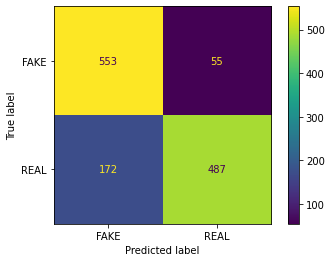

In [41]:
plot_confusion_matrix(linear_b,x_test,y_test)